In [48]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "morales-evelyn"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
   print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/HW1"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")


📥 Cloning repo from https://github.com/morales-evelyn/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/morales-evelyn/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW1


In [52]:
import pandas as pd
ipa = pd.read_excel("IPA.xlsx")
ipa.head()

,Weeks,IBU
0,3 Weeks,39.41
1,3 Weeks,53.18
2,3 Weeks,35.31
3,3 Weeks,59.62
4,3 Weeks,40.95


In [54]:
ipa.groupby("Weeks")["IBU"].agg(["mean", "std", "count"])

,mean,std,count
Weeks,,,
3 Weeks,49.216,8.300656,10
4 Weeks,62.751,8.250384,10
5 Weeks,69.725,5.631258,10


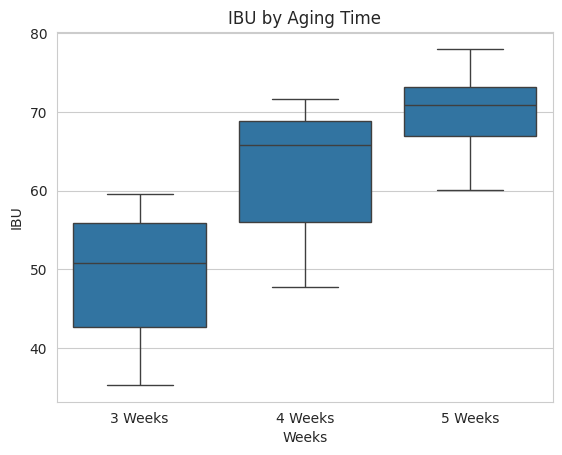

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title("IBU by Aging Time")
sns.boxplot(x="Weeks", y="IBU", data=ipa)
sns.set_style("whitegrid")
plt.show()

In [63]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
ipa_model = ols("IBU ~ Weeks", data=ipa).fit()
sm.stats.anova_lm(ipa_model, typ=1)


,df,sum_sq,mean_sq,F,PR(>F)
Weeks,2.0,2174.83994,1087.419970,19.339842,0.000006
Residual,27.0,1518.12718,56.226933,NaN,NaN


In [69]:
import scipy.stats as stats
stats.levene

<function scipy.stats._morestats.levene(*samples, center='median', proportiontocut=0.05, axis=0, nan_policy='propagate', keepdims=False)>

In [65]:
ipa_model = ols("IBU ~ Weeks", data=ipa).fit()
sm.stats.anova_lm(ipa_model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
Weeks,2.0,2174.83994,1087.419970,19.339842,0.000006
Residual,27.0,1518.12718,56.226933,NaN,NaN


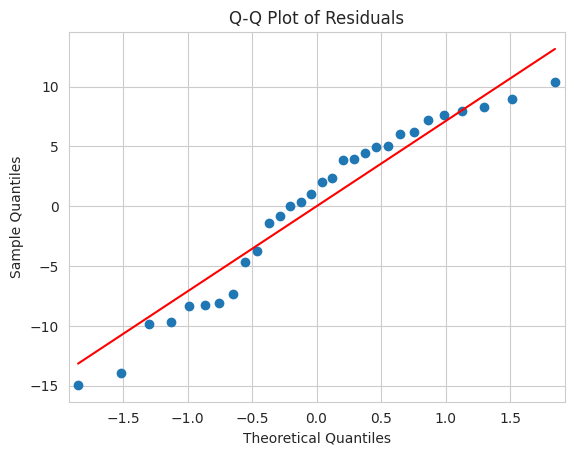

In [68]:
residuals = ipa_model.resid
sm.qqplot(residuals, line="s")
plt.title("Q-Q Plot of Residuals")
plt.show()

In [73]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(ipa_model.resid, ipa_model.model.exog)
f_statistic = bp_test[2]
p_value = bp_test[3]
print("BP Test F-statistic:", f_statistic)
print("BP Test p-value:", p_value)


BP Test F-statistic: 1.2952914537529732
BP Test p-value: 0.2902941540365849


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
3 Weeks 4 Weeks   13.535 0.0011  5.2205 21.8495   True
3 Weeks 5 Weeks   20.509    0.0 12.1945 28.8235   True
4 Weeks 5 Weeks    6.974 0.1131 -1.3405 15.2885  False
------------------------------------------------------


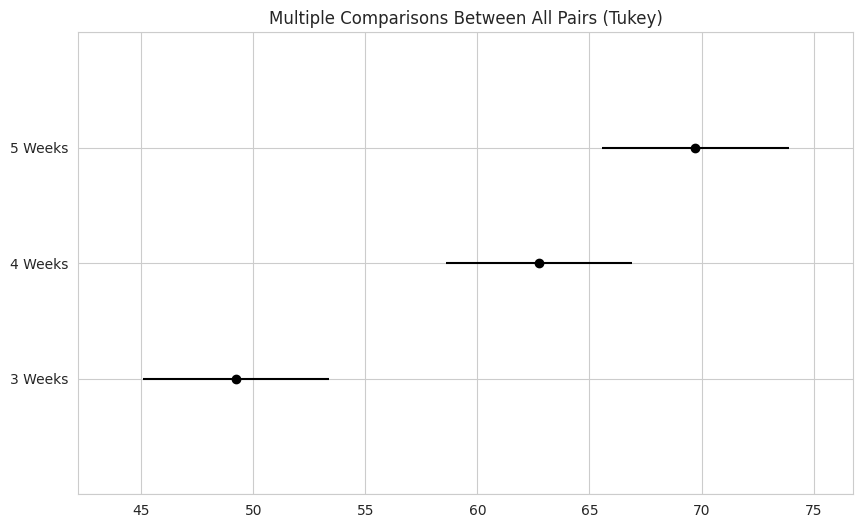

In [74]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
turkey_results = pairwise_tukeyhsd(ipa["IBU"], ipa["Weeks"], alpha=0.05)
turkey_results.plot_simultaneous()
print(turkey_results)

# Homework 1: Completely Randomized Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: February 6, 2026**

**INSTRUCTIONS:** You are a quality control analyst for a craft brewery experimenting with a new India Pale Ale (IPA). One key quality attribute of IPA is its bitterness, measured in International Bitterness Units (IBUs). The brewery wants to determine if the aging time (3, 4, or 5 weeks) affects the IBUs of the beer. To test this, the brewing team brews a single batch of the experimental IPA and divides it into aging tanks, with each tank randomly assigned to be aged for 3, 4, or 5 weeks. After aging, the IBUs of ten randomly selected bottles from each aging time are measured using a spectrophotometer. The data are in the file `IPA.xlsx`. With these data, I want you to:

**Question 1.** Briefly define the objective of this experiment
The objective is to determine if the aging time will affet the bitterness of the beer (IPA) in IBU's.

**Question 2.** Specify the outcome variable
The dependent variable is the IBU's.

**Question 3.** Specify the independent variable. What are some possible lurking variables?
The independent variable or the regressor would be time in weeks. Other variables include human error, tank or bottle irregularities temperature spikes etc.

**Question 4.** Briefly explain why a completely randomized design may be appropriate for this experiment.
A completely randomized design is appropriate because we are studying the effect of one factor. SInce there maybe multiple variables that can influence bitterness, a randomized design will help ditribute those variables across groups.

**Question 5.** State the null and alternative hypotheses for this experiment.
null is the mean IBU across aging times and the alternate would be at least 1 population mean differs.

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?
Based on the summary statitics there is a clear trend showing an increasing IBU as aging time incerases. The boxpolt shows an increasing median from 3 to 5 weeks. The results strongly support the alternate hypothesis.

**Question 7.** Build a one-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?
 The Q-Q plot shows that the residuals are falling along the straight line suggesting nomality assumptions are reasonable.

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?
Yes based both visual and the bp test it supports the assumptions of homogeneity

**Question 9.** Report the F-statistic and its associated p-value from the one-way ANOVA model. Which of our two hypotheses is more strongly supported? Why? The ANOVA results were F=19.34 and p value was less than .05 we reject the null hypotheses and conclude that one of the aging times has a different IBU. The alternate is highly supportive.

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which aging times are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.
Tukeys's HSD was performed a = 0.05 The results indicate that the IBU at week 3 is significabntly differnt than week 4 and 5.

**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses. Additionally, describe any limitations of the experiment and/or your analyses, and suggest potential improvements for future experiments of this nature.
In conclusion the EDA showed that the mean IBU increased as aging time increased. The ANOVA resukts produced significant F-statitics p<.001 providing strong evidence against the null hypothesis. Additionally the Q_Q plot showed linearity and the post hoc test revealed week 3 being different than week 4 and 5.
The limitations of this experiment was the sample size in future experiment I would add a larger randon sample size and maybe test other variables to see if there could be any other relationships.